In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

from framework_pkg.framework import FrameWork

plt.rcParams['text.usetex']=True
plt.style.use('classic')

param ={'SinT12'  : 0.308 ,
        'T13'  : 8.57, 
        'mu1'  : 0.,
        'mu2'  : 1e-7, 
        'mu3'  : 0.  ,
        'mdm'  : 1e3 , 
        'alpha': 0.  ,
        'epsx' : 0.  ,
        'epsy' : 1.  ,
        'M12'  : 6.9e-5 }



annual_data = np.array(pd.read_csv('./Data/plot-data.csv'))

In [6]:
frame_predicted_total_signal  = FrameWork(threshold=4.5,
                                        efficiency_correction=True,
                                        resolution_correction=False,
                                        first_day='2015,1,1',
                                        last_day='2016,1,1'
                                    )

predicted_total_signal = frame_predicted_total_signal.__getitem__(param, name="ULDM") 

print(np.mean(predicted_total_signal))



/Users/ipm/Documents/GitHub/NeuMod/external/PEANUTS/peanuts/files.py:74: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(*args, **kwargs)
/Users/ipm/Documents/GitHub/NeuMod/external/PEANUTS/peanuts/files.py:74: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(*args, **kwargs)
/Users/ipm/Documents/GitHub/NeuMod/external/PEANUTS/peanuts/files.py:74: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(*args, **kwargs)
/Users/ipm/Documents/GitHub/NeuMod/external/PEANUTS/peanuts/files.py:74: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  return pd.read_csv(*args

0.435151865270443


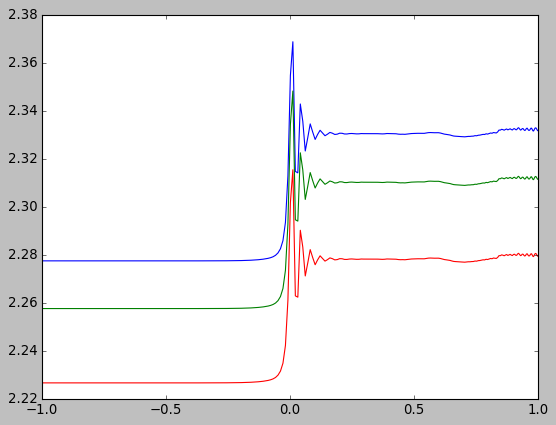

In [7]:
plt.plot(np.cos(frame_predicted_total_signal.eta), 1e4 * frame_predicted_total_signal.SNO_norm * predicted_total_signal[0,:,0], 'b-')
plt.plot(np.cos(frame_predicted_total_signal.eta), 1e4 * frame_predicted_total_signal.SNO_norm * predicted_total_signal[80,:,0], 'r-')
plt.plot(np.cos(frame_predicted_total_signal.eta), 1e4 * frame_predicted_total_signal.SNO_norm * np.mean(predicted_total_signal[:,:,0],axis=0), 'g-')

<ErrorbarContainer object of 3 artists>

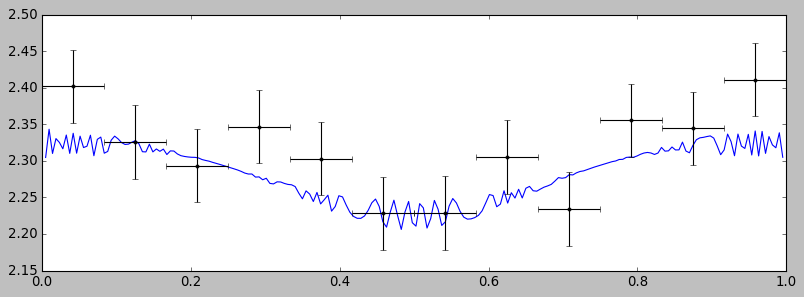

In [8]:
plt.figure(figsize=(12,4))
plt.xlim(0,1)


plt.plot(frame_predicted_total_signal.day, 1e4 * frame_predicted_total_signal.SNO_norm * np.mean(predicted_total_signal,axis=(1,2)), 'b-')

plt.errorbar(annual_data[:,0], annual_data[:,1], 0.05 * np.ones(12), 0.5*(annual_data[1,0] - annual_data[0,0])*np.ones(12) , fmt='k.')